In [2]:
import pandas as pd


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

In [4]:
sb=df.groupby('class')['survived'].mean()

print(sb)

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


In [5]:
df['age_group'] = df['age'].apply(lambda x: 'child' if pd.notnull(x) and x < 18 else 'adult')

In [6]:
def pt(row):
    if row['age'] < 18:
        return f"{row['sex']} child"
    else:
        return row['sex']
    
df['person_type'] = df.apply(pt, axis=1)
print(df[['age', 'sex', 'person_type']].head(10))

    age     sex   person_type
0  22.0    male          male
1  38.0  female        female
2  26.0  female        female
3  35.0  female        female
4  35.0    male          male
5   NaN    male          male
6  54.0    male          male
7   2.0    male    male child
8  27.0  female        female
9  14.0  female  female child


In [7]:
sb=df.groupby('class')['survived'].mean()

probablity_of_maleChild_survived =   df[(df['person_type'] == 'male child') & (df['survived'] == 1)].shape[0] / df[df['person_type'] == 'male child'].shape[0]
probablity_of_femaleChild_survived = df[(df['person_type'] == 'female child') & (df['survived'] == 1)].shape[0] / df[df['person_type'] == 'female child'].shape[0] 
probablity_of_maleAdult_survived = df[(df['person_type'] == 'male') & (df['survived'] == 1)].shape[0] / df[df['person_type'] =='male'].shape[0]
probablity_of_femaleAdult_survived = df[(df['person_type'] == 'female') & (df['survived'] == 1)].shape[0] / df[df['person_type'] == 'female'].shape[0]

print(f"Probability of female child survived: {probablity_of_femaleChild_survived}")
print(f"Probability of male adult survived: {probablity_of_maleAdult_survived}")
print(f"Probability of female adult survived: {probablity_of_femaleAdult_survived}")

print(f"Probability of male child survived: {probablity_of_maleChild_survived}")    

Probability of female child survived: 0.6909090909090909
Probability of male adult survived: 0.16570327552986513
Probability of female adult survived: 0.752895752895753
Probability of male child survived: 0.39655172413793105


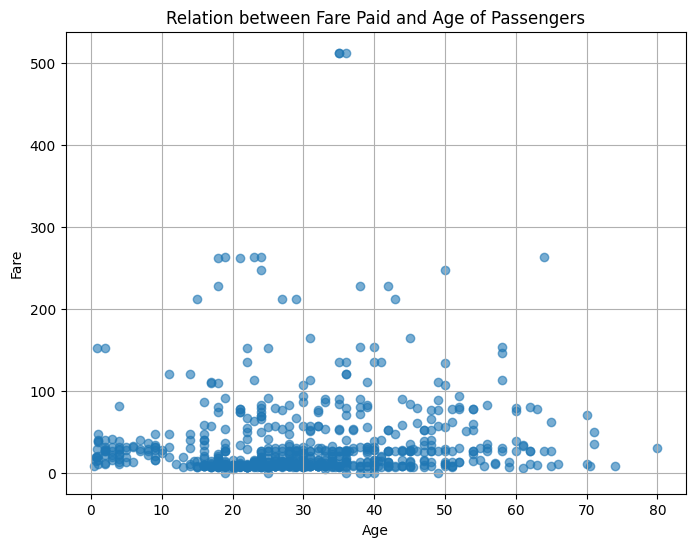

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['fare'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relation between Fare Paid and Age of Passengers')
plt.grid(True)
plt.show()

In [9]:
# P(not survived | adult male)
p_not_survived_adult_male = df[(df['person_type'] == 'male') & (df['survived'] == 0)].shape[0] / df[df['person_type'] == 'male'].shape[0]

# P(not survived | adult male, class)
p_not_survived_adult_male_class = df[df['person_type'] == 'male'].groupby('class')['survived'].apply(lambda x: (x == 0).mean())

print(f"P(not survived | adult male): {p_not_survived_adult_male}")
print("P(not survived | adult male, class):")
print(p_not_survived_adult_male_class)

# If P(not survived | adult male, class) == P(not survived | adult male) for all classes, then independent
independence = all(abs(p - p_not_survived_adult_male) < 1e-6 for p in p_not_survived_adult_male_class)
print(f"Are the events independent? {independence}")

P(not survived | adult male): 0.8342967244701349
P(not survived | adult male, class):
class
First     0.652542
Second    0.917526
Third     0.878289
Name: survived, dtype: float64
Are the events independent? False


In [10]:
average_ageof_passengers_survived = df[df['survived'] == 1]['age'].mean()
average_ageof_passengers_not_survived = df[df['survived'] == 0]['age'].mean()   
print(f"Average age of passengers who survived: {average_ageof_passengers_survived}")
print(f"Average age of passengers who did not survive: {average_ageof_passengers_not_survived}")

Average age of passengers who survived: 28.343689655172415
Average age of passengers who did not survive: 30.62617924528302


In [11]:
average_fare=df.groupby('survived')['fare'].mean()
print(average_fare)
print("average fair paid by people who survived{}: ",average_fare[1])
print("average fair paid by people who did not survive{}: ",average_fare[0])



survived
0    22.117887
1    48.395408
Name: fare, dtype: float64
average fair paid by people who survived{}:  48.39540760233918
average fair paid by people who did not survive{}:  22.117886885245902


In [12]:
average_ageof_passengers_survived = df[df['survived'] == 1]['age'].mean()
average_ageof_passengers_not_survived = df[df['survived'] == 0]['age'].mean()
# print(f"Average age of passengers who survived: {average_ageof_passengers_survived}")

# print(f"Average age of passengers who did not survive: {average_ageof_passengers_not_survived}")

average_fare_paid_by_survived = df[df['survived'] == 1]['fare'].mean()
average_fare_paid_by_not_survived = df[df['survived'] == 0]['fare'].mean()
print(f"Average fare paid by passengers who survived: {average_fare_paid_by_survived}")
print(f"Average fare paid by passengers who did not survive: {average_fare_paid_by_not_survived}")

Average fare paid by passengers who survived: 48.39540760233918
Average fare paid by passengers who did not survive: 22.117886885245902


In [13]:
# Display how the probability of not surviving for adult males changes across classes
print("Probability of not survived | adult male, by class:")
print(p_not_survived_adult_male_class)

print("\nOverall probability of not survived | adult male:")
print(p_not_survived_adult_male)

print("\nDifference from overall probability for each class:")
print((p_not_survived_adult_male_class - p_not_survived_adult_male).round(3))

# Interpretation
for cls, prob in p_not_survived_adult_male_class.items():
    diff = prob - p_not_survived_adult_male
    print(f"In {cls} class, the probability is {prob:.3f} ({'higher' if diff > 0 else 'lower'} than overall by {abs(diff):.3f})")

Probability of not survived | adult male, by class:
class
First     0.652542
Second    0.917526
Third     0.878289
Name: survived, dtype: float64

Overall probability of not survived | adult male:
0.8342967244701349

Difference from overall probability for each class:
class
First    -0.182
Second    0.083
Third     0.044
Name: survived, dtype: float64
In First class, the probability is 0.653 (lower than overall by 0.182)
In Second class, the probability is 0.918 (higher than overall by 0.083)
In Third class, the probability is 0.878 (higher than overall by 0.044)


In [14]:
df.to_csv("titanic.csv", index=False)